# <center style="font-size:140%;"> Report - Project 1: Combustion Thermodynamics

<center>
<span style="font-size:160%;">**McGill University, Montreal** </span> <br>
MECH(447|652) - Dynamics of Combustion <br>
Project #*1*
</center>

<center>Submitted to 
<center>**Gilles Bourque**
<center>by
<center>**Pierrick Hamard (260619897)**

<center>October 3, 2019
<center>Montreal, Quebec, Canada

## Table of Content

* [Introduction](#Introduction)

* [Part 1 - Complete Combustion: $\,\mathrm{C_3H_8}+\mathrm{Air\,Flames}$](#Section1)
    * [1.1 - Global Reaction Equations for Stoichiometric, Lean and Rich Conditions](#Section1_1)
    * [1.2 - Heating Values (LHV and HHV)](#Section1_2)
    * [1.3 - Adiabatic Flame Temperature](#Section1_3)
    * [1.4 - Thermodynamic Data](#Section1_4)
        * [1.4.1 - Enthalpy [kJ/mol] and Entropy [kJ/mol-K] Values for $\,\mathrm{C_3H_8}$, $\mathrm{O_2}$, and $\mathrm{O}$](#Section1_4_1)
        * [1.4.2 - Polynomial Coefficients of $\,\mathrm{H}$ and $\mathrm{H_2}$ for a Temperature Range of 1000 to 6000 K](#Section1_4_2)
        * [1.4.3 - Enthalpy [kJ/mol] for $\,\mathrm{OH}\,$ and $\,\mathrm{N_2}$ at Temperature 2000 K](#Section1_4_3)
    * [1.5 - Bonus Question ( Progress of Water-Gas Shift Reaction at Different Temperatures)](#Section1_5)
    
* [Part 2  -  Chemical Equilibrium:  $\mathrm{C_2H_6}$ + Air Flames](#Section2) 
    * [2.1 - Adiabatic Flame Temperature and Equilibrium Composition for a Range of Equivalence Ratios](#Section2_1)
    * [2.2 - Adiabatic Flame Temperature and Equilibrium Composition for a Range of Pressures](#Section2_2)
    * [2.3 - Adiabatic Flame Temperature and Equilibrium Composition for a Range of Initial Temperatures](#Section2_3)
    * [2.4 - Bonus Question](#Section2_4)
    
* [Part 3 - Chemical Equilibrium: Exhaust Gas Recirculation (EGR)](#Section3)
    * [3.1 - $\,\mathrm{CO_2}$ Dilution in $\,\mathrm{CH_4}+\mathrm{Air\,Flames}$](#Section3_1)
        * [3.1.1 - Effect of $\,\mathrm{CO_2}$ Dilution on Adiabatic Flame Temperature](#Section3_1_1)
        * [3.1.2 - Estimation of adiabatic flame temperature with 100% dilution by $CO_2$](#Section3_1_2)
        * [3.1.3 - Concentrations of $NO$, $NO_2$ and $CO$ for a range of $CO_2$ dilution levels](#Section3_1_3)
    * [3.2 - Bonus question ($\,\mathrm{Ar}$ Dilution in $\,\mathrm{CH_4}+\mathrm{Air\,Flames}$)](#Section3_2)
        * [3.2.1 - Effect of $\,\mathrm{Ar}$ Dilution on Adiabatic Flame Temperature](#Section3_2_1)
        * [3.2.2 - Estimation of adiabatic flame temperature with 100% dilution by $Ar$](#Section3_2_2)
        * [3.2.3 - Concentrations of $NO$, $NO_2$ and $CO$ for a range of $Ar$ dilution levels](#Section3_2_3)
        
* [Conclusion](#Conclusion)

## Introduction

The intensity of combustion between a fuel and an oxidizer depends on their relative concentrations. When their concentration ratio is chemically correct (in that all the reactants can be totally consumed in the reaction), then the combustion intensity is close to the highest and we call this mode of burning **stoichiometric combustion**. To identify the deviation of a mixture’s concentration from stoichiometry, an **Equivalence Ratio $\phi$** is considered. It is defined as:

$$\phi=\frac{F\,/\,A}{(F\,/\,A)_{st}}$$

where $(F\,/\,A)$ is the ratio of the mass of fuel to the mass of air (the oxidizer) in the mixture. The subscript "$st$" denotes the stoichiometric state.<br>

A combustion reaction can proceed in one of three ways with regard to the equivalence ratio of the fuel-air mixture. For an equivalence ratio of 1, the reaction is said to be stoichiometric and will undergo complete combustion, menaing that all of the fuel and all of the air will be used during the combustion reaction. An equivalence ratio greater than zero but less than 1 indicates that the fuel-air mixture is lean meaning that there is an excess of air and not enough fuel. When the equivalence ratio is greater than one the fuel-air mixture is rich meaning that there is too much fuel and not enough air for complete combustion to occur.<br>

This report will explore the concept of **Adiabatic Flame Temperature**, $T_{ad}$, which is the temperature reached by the products of a reaction in the case where no heat is exchanged with the system's surroundings, hence adiabatically. The variation of adiabatic temperature for different equivalence ratios spanning the three cases of combustion, as well as changes in pressure and initial temperature of the reaction, will be studied. The resulting equilibrium concentrations of the species present will also be analyzed.

**Basic packages required for labs**

The Python kernel is initialized for Cantera, Numpy, MatplotLib, Math, and yaml with the commands below.

In [35]:
%matplotlib inline
import cantera as ct 
import numpy as np
import matplotlib.pyplot as plt
import math
import yaml
from scipy.optimize import fsolve

In [36]:
class thermo:
    
    def __init__(self, species, MW) :
        """
        species: input string name of species in thermoData.yaml
        M: input (species molecular weight, kg/kmol)
        """
        
        self.Rgas = 8.31446      # J/mol*K
        self.M    = MW
    
        with open("thermoDataNASA-9.yaml") as yfile:
           yfile = yaml.load(yfile, Loader=yaml.FullLoader)
        
        yaml.warnings({'YAMLLoadWarning': False})
        
        self.a_lo = yfile[species]["a_lo"]
        self.a_hi = yfile[species]["a_hi"]
        
        self.T_lo = 200.
        self.T_mid = 1000.
        self.T_hi = 6000.
        
    def cymalalo(self) :
        return self.a_lo

    def cymalahi(self) :
        return self.a_hi

    def cp_mole(self,T) :
        """
        return calorific value at cst p in units J/kmol/K
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")

        cp = a[0]/T**2 + a[1]/T + a[2] + a[3]*T + a[4]*T**2.0 + a[5]*T**3 + a[6]*T**4
        
        return cp * self.Rgas
        
    #--------------------------------------------------------

    def cp_mass(self,T) :
        """
        return calorific value at cst P in units of J/kg/K
        T: input (K)
        """
        return self.cp_mole(T)/self.M

    #--------------------------------------------------------
    
    def h_mole(self,T) :
        """
        return enthalpy in units of J/mol
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")

        hrt = -a[0]/T**2 + a[1]*np.log(T)/T + a[2] + a[3]/2*T + a[4]/3*T**2.0 + a[5]/4*T**3 + a[6]/5*T**4 + a[7]/T
        
        return hrt * self.Rgas * T
        
    #--------------------------------------------------------

    def h_mass(self,T) :
        """
        return enthalpy in units of J/kg
        T: input (K)
        """
        return self.h_mole(T)/self.M

    #--------------------------------------------------------
        
    def s_mole(self,T) :
        """
        return entropy in units of J/mol/K
        T: input (K)
        """
        if T<=self.T_mid and T>=self.T_lo :
            a = self.a_lo
        elif T>self.T_mid and T<=self.T_hi :
            a = self.a_hi
        else :
            print ("ERROR: temperature is out of range")
        
        sr = -a[0]/2/T**2 - a[1]/T + a[2]*np.log(T) + a[3]*T + a[4]/2.0*T**2.0 + a[5]/3.0*T**3.0+ a[6]/4.0*T**4.0+ a[8]
        
        return sr * self.Rgas
        
    #--------------------------------------------------------

    def s_mass(self,T) :
        """
        return entropy in units of J/kg/K
        T: input (K)
        """
        return self.s_mole(T)/self.M

<a id='Section1'><a>


## Part 1 - Complete Combustion: $\,\mathrm{C_3H_8}+\mathrm{Air\,Flames}$



Complete, or stoichiometric combustion is a combustion process in which the reaction proceeds until the limiting reactant is exhausted. In this case of combustion, all reactant carbon and hydrogen atoms are used to create carbon dioxide and water. <br>
Complete combustion is the starting point for exploring combustion reactions. 
Here, the complete combustion of propane, $\mathrm{C_3H_8}$, as the fuel oxidized by air will be explored.<br>
<br>
This section will be completed using the data resulting from the work of McBride et al. from tr NASA Glenn Research Center.

<a id='Section1_1'><a>


### 1.1 - Global Reaction Equations for Stoichiometric, Lean and Rich Conditions


#### Stoichiometric Mixtures:

In stoichiometric mixtures, ($\phi = 1$) we have complete combustion of propane and air, in which there is no oxygen remainaining in the products. Hence:<br>

$$C_3H_8+5(O_2+3.76N_2)\rightarrow3CO_2+4H_2O+18.8N_2$$

#### Fuel-Lean Mixtures:

In fuel-lean mixtures, we assume the complete conversion of $C$ to $CO_2$ and $H$ to $H_2O$, with the excess oxygen remaining as $O_2$. The stoichiometric equation for complete combustion of a lean propane/air mixture ($\phi < 1$) is:

$$\mathrm{\phi C_3H_8 + 5(O_2 + 3.76 N_2) \rightarrow 3\phi CO_2 + 4\phi H_2O + 5 (1-\phi) O_2 + 18.8 N_2}$$


#### Fuel-Rich Mixtures:
In fuel-rich mixtures, oxygen is completely reacted but $CO$ and $H_2$ are now present as the major product species. Thus, a general stoichiometric equation for a rich propane/air mixture ($\phi > 1$) can be written as:

$$\mathrm{\phi C_3H_8 + 5(O_2 + 3.76 N_2) \rightarrow a CO_2 + b CO + c H_2O + d H_2 + 18.8 N_2}$$

where a, b, c, and d are constrained by the element conservation relations:

$$C: \;\;\;\; 3\phi = a+b$$
$$H: \;\;\;\; 4\phi = c+d$$
$$O: \;\;\;\; 10 = 2a+b+c$$

For a $\mathrm{CO_2}$-to-$\mathrm{CO}$ mole fraction ratio $\left(\dfrac{X_{CO_2}}{X_{CO}}\right)= 9$, the coefficients are:$\;\;\;\;\;\;\; a = 2.7\phi \;\;\;\;\;\;\; b = 0.3\phi \;\;\;\;\;\;\; c = 10 - 5.7\phi \;\;\;\;\;\;\; d = 9.7\phi -10 $

Thus, the stoichiometric equation for a rich propane/air mixture ($\phi > 1$) with a $\mathrm{CO_2-to-CO}$ mole fraction ratio of 9 becomes:

$$\mathrm{\phi C_3H_8 + 5(O_2 + 3.76 N_2) \rightarrow 2.7 \phi CO_2 + 0.3 \phi CO + (10 - 5.7\phi) H_2O + (9.7\phi -10) H_2 + 18.8 N_2}$$


<a id='Section1_2'><a>

### 1.2 - Heating Values (LHV and HHV)


The heat of combustion is defined as the amount of heat release when 1 mole of a fuel in its standard state is completely reacted with oxygen to form $H_2O$, $CO_2$, and $N_2$. It is equivalent to the heat of reaction $\delta H_r$ which is the difference between the enthalpy of the products and the reactants:

$$q_c=\sum N_pH_p - \sum N_rH_r$$

It is necessary to distinguish whether the product water exists in the gaseous state, $H_2O(g)$, or the liquid state, $H_2O(l)$. Since the former case has less heat release, the heat of combustion with water present in the gaseous state is called the Lower Heating Value (LHV) of the fuel. Equivalently, in the latter case, the heat of combustion with water present in the liquid state is called the Higher Heating Value (HHV) of the fuel.


#### Lower Heating Value (LHV):

The lower heating value, $LHV$, is computed as follows:
$$LHV=\frac{q_c}{M_f}$$

where $q_c$ is the heat of combustion (kJ/kmol) and $M_f$ is the molecular mass of the fuel (kg/kmol).

For the complete combustion of propane at an initial temperature of 300K and an initial pressure of 1 atm, the LHV can be found as follows:

In [61]:
gas = ct.Solution('gri30.cti')

# Set reactants state
gas.TPX = 300, ct.one_atm, 'C3H8:1, O2:5'
h_reactants = gas.enthalpy_mass
Y_C3H8 = gas['C3H8'].Y[0] # returns an array, of which we only want the first element
#print(h_reactants)

# set state to complete combustion products without changing T or P
gas.TPX = None, None, 'CO2:3, H2O:4' 
h_products = gas.enthalpy_mass
#print (h_products)

# Get the Lower Heating Value (LHV)
print('LHV = {:.3f} MJ/kg'.format(-(h_products-h_reactants)/Y_C3H8/1e6))

LHV = 46.351 MJ/kg


#### Higher Heating Value (HHV):

The higher heating value (HHV) is computed as follows:
$$HHV=LHV+\alpha \Delta _{fg|H_2O}$$

where $\Delta _{fg|H_2O}$ is the heat of vaporization of water and $\alpha$ is the latent heat of vaporization, which is the proportion of liquid water in comparison to the amount of fuel,
$$\alpha = \frac{m_{H_2O\;produced}}{m_{fuel\;consumed}}$$

In [65]:
# Set liquid water state, with vapor fraction x = 0
water = ct.Water()
water.TX = 300, 0
h_liquid = water.h

# Set gaseous water state, with vapor fraction x = 1
water.TX = 300, 1
h_gas = water.h

# Calculate the Higher Heating Value (HHV)
Y_H2O = gas['H2O'].Y[0]
print('HHV = {:.3f} MJ/kg'.format(-(h_products-h_reactants + (h_liquid-h_gas) * Y_H2O)/Y_C3H8/1e6))

HHV = 50.335 MJ/kg


<a id='Section1_3'><a>

### 1.3 - Adiabatic Flame Temperature

If a given uniform mixture with an initial temperature and composition is made to approach chemical equilibrium through an adiabatic, isobaric process at pressure P, then the final temperature is the adiabatic flame temperature, $T_{ad}$. This quantity is of importance in the study of combustion because it not only indicates the exothermicity and the maximum attainable temperature of this mixture when equilibrium is attained, but it also directly affects the reactivity of the various chemical processes including those involving pollutant formation.

Adiabatic flame temperature can be determined by exploiting the relationship between reactant and product enthalpies,

$$H_{reactants}=H_{products}$$

Here,
$$H_{reactants}=\sum_{reactants} N_ih_i$$

$$H_{products}=\sum_{products} N_ih_i$$

where, $N_i$ is the number of moles of species $i$ and $h_i$ is the molar enthalpy of species $i$.<br>
<br>
When computing the reactant enthalpy, $H_{reactants}$, the molar enthalpy of the reactant species must be evaluated at the intial temperature of the reaction whereas the molar enthalpy of the product species must be evaluated at the adiabatic temperature when computing the product enthalpy, $H_{products}$.<br>
<br>
As such, for a given initial temperature, the function f.solve can be used to iterate the adiabatic temperature at which the product molar enthalpies are evaluated until the difference between the reactant and product enthalpies is zero. When the difference is zero the iteration will be completed as the correct adiabatic flame temperature will be obtained.<br>
<br>
This computation will be repeated in order to determine the adiabatic flame temperature of $C_3H_8$ for a range of equivalence ratios.

In [68]:
# Define a function (f_flame) that returns the enthalpy difference between products and reactants

def f_flame(T):
    
    Tr = 300;
    
    # Molecular Masses [kg/kmol]
    M_C3H8 = 44.1;
    M_O2 = 32.00;
    M_N2 = 28.01;
    M_CO2 = 44.01;
    M_H2O = 18.02;
    M_CO = 28.01;
    M_H2 = 2.02;
    
    # Thermo Objects
    t_C3H8 = thermo('C3H8',M_C3H8);
    t_O2 = thermo('O2',M_O2);
    t_N2 = thermo('N2',M_N2);
    t_CO2 = thermo('CO2',M_CO2);
    t_H2O = thermo('H2O',M_H2O);
    t_CO = thermo('CO',M_CO);
    t_H2 = thermo('H2',M_H2);
    
    # Enthalpy of Reactants (@ given temperature Tr)
    h_reactants = (nr_C3H8 * t_C3H8.h_mole(Tr)) + (nr_O2 * t_O2.h_mole(Tr)) + (nr_N2 * t_N2.h_mole(Tr));
    #print(h_reactants)
    
    # Enthalpy of Products (@ temperature T to be found)
    h_products = (np_CO2 * t_CO2.h_mole(T)) + (np_CO * t_CO.h_mole(T)) + (np_N2 * t_N2.h_mole(T)) + \
                 (np_H2O * t_H2O.h_mole(T)) + (np_H2 * t_H2.h_mole(T)) + (np_O2 * t_O2.h_mole(T));
    #print(h_products)
    
    # Return the difference of both
    # The temperature T at which the difference reaches zero (i.e. h_r = h_p) is the adiabatic flame temp. Ta  
    return h_products - h_reactants;


In [97]:
# Define the given range of equivalence ratios (phi)
# numpy was already initialized (imported) beforehand
phi = np.linspace(0.5,1.6,23) # 23 elements in the array = step of 0.05
#print(phi)


# Define an initial guess for Tad
T = 1800   # [K]

# Define an array of zeros that will be filled up with the T{adiabatic} values at each value of phi
Ta = np.zeros(len(phi))

print ('\nThe Adiabatic flame temperatures for each Equivalence Ratio ranging from 0.5 to 1.6 with a step of 0.05 are:\n')

for i in range(len(phi)):
    
    if phi[i] <= 1.0:                           # Fuel-Lean Mixture
        # Number of moles of reactants:
        nr_C3H8 = phi[i];
        nr_O2 = 5.0;
        nr_N2 = 18.8;
        # Number of moles of products:
        np_CO2 = 3.0*phi[i];
        np_H2O = 4.0*phi[i];
        np_O2 = 5.0*(1.0-phi[i]);
        np_N2 = 18.8;
        np_CO = 0.0;
        np_H2 = 0.0;
        # Calculate temp
        Ta[i] = fsolve(f_flame,T);
        print('phi = %3.2f  :' % phi[i], '    T_ad = %5.6f K' % Ta[i])
    else:                                        # Fuel-Rich Mixture
        # Number of moles of reactants:
        nr_C3H8 = phi[i];
        nr_O2 = 5.0;
        nr_N2 = 18.8;
        # Number of moles of products:
        np_CO2 = 2.7*phi[i];
        np_CO = 0.3*phi[i];
        np_H2O = 10.0 - 5.7*phi[i];
        np_H2 = 9.7*phi[i] - 10.0;
        np_N2 = 18.8;
        np_O2 = 0.0;
        # Calculate temp
        Ta[i] = fsolve(f_flame,T);
        print('phi = %3.2f  :' % phi[i], '    T_ad = %5.6f K' % Ta[i])
         


The Adiabatic flame temperatures for each Equivalence Ratio ranging from 0.5 to 1.6 with a step of 0.05 are:

phi = 0.50  :     T_ad = 1511.207905 K
phi = 0.55  :     T_ad = 1610.143118 K
phi = 0.60  :     T_ad = 1706.312126 K
phi = 0.65  :     T_ad = 1799.883553 K
phi = 0.70  :     T_ad = 1891.004925 K
phi = 0.75  :     T_ad = 1979.807072 K
phi = 0.80  :     T_ad = 2066.407311 K
phi = 0.85  :     T_ad = 2150.911796 K
phi = 0.90  :     T_ad = 2233.417297 K
phi = 0.95  :     T_ad = 2314.012574 K
phi = 1.00  :     T_ad = 2392.779458 K
phi = 1.05  :     T_ad = 2348.188574 K
phi = 1.10  :     T_ad = 2310.926632 K
phi = 1.15  :     T_ad = 2274.309489 K
phi = 1.20  :     T_ad = 2238.319751 K
phi = 1.25  :     T_ad = 2202.940696 K
phi = 1.30  :     T_ad = 2168.156242 K
phi = 1.35  :     T_ad = 2133.950915 K
phi = 1.40  :     T_ad = 2100.309813 K
phi = 1.45  :     T_ad = 2067.218583 K
phi = 1.50  :     T_ad = 2034.663392 K
phi = 1.55  :     T_ad = 2002.630900 K
phi = 1.60  :     T_ad = 1971.1

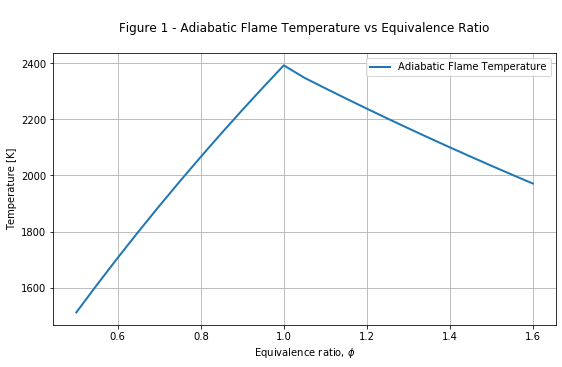

In [98]:
# Plot of Adiabatic Flame Temperature vs Equivalence Ratio

plt.figure(figsize=[9,5])
plt.plot(phi, Ta, label='Adiabatic Flame Temperature', lw=2);  
plt.title('\nFigure 1 - Adiabatic Flame Temperature vs Equivalence Ratio\n')
plt.xlabel('Equivalence ratio, $\phi$');
plt.ylabel('Temperature [K]');
plt.grid(True);
plt.legend(loc=1);

With regard to the graph, it can be seen that the adiabatic temperature, $T_{ad}$, is the highest (peaks) around 2393K at $\phi=1$, and then decreases steadily, however assymetrically, towards leaner or richer mixtures. The lean zone has a steeper slope than that of the rich mixture zone as a result of the assymetry in the definition of the equivalence ratio. In the zone of lean mixture, some of the energy from combustion is absorbed in heating up excess reactants, which therefore brings down the adiabatic flame temperature. In the zone of rich mixture, the formation of additional products such as $CO$ and $H_2$ also absorb some energy. This is due to the fact that their $C_p$ is larger than that of $C_3H_8$, as a result of their total number of moles being larger than the original molecule of propane. This will therefore result in a lower $T_{ad}$ value.

#### Note: Dependence of Adiabatic Flame Temperature on Pressure and Reactants' Temperature:

In the case of part 1, we assume an ideal case of complete (adiabatic and isobaric) combustion, meaning no heat transfer or work occuring through the process. Therefore, the adiabatic temperature, $T_{ad}$, is not dependent on the pressure, however it is dependant on the reactants' temperature since it's a factor in the formula. For a system disturbed by a change in temperature, the system attempts to reequilibrate. To do so, the system shifts the reaction in favour of the production of reactants or products, depending on the imposed change in conditions. In a reaction such as the combustion of propane, the dissociation reactions of major product species such as $CO_2$ and $H_2O$ to minor species such as $O_2$, $CO$ and $H_2$ will be affected by a change in reactant temperature. <br> 

It is important to note that in reality, as will be seen in part 2, there is reduced amount of dissociation with increasing pressure and as such implies that $T_{ad}$ is higher at higher pressures, with this effect being strongest near stoichiometry. This concludes that the pressure does affect $T_{ad}$, but as previously stated, we assume that pressure does not affect $T_{ad}$ for the purposes of part 1. <br>

The dissociation reactions of interest are as follows:

$$CO_2\rightarrow 2CO+O_2$$
$$2H_2O\rightarrow 2H_2+O_2$$

<a id='Section1_4'><a>


### 1.4 - Thermodynamic Data


The work performed by McBride et al. at the NASA Glenn Research Center is valuable when performing combustion computations that involve enthalphy, entropy and specific heats. The specific heat at constant pressure, cp(T), the enthalpy, h(T) and the entropy, s(T), have been least-square fitted to polynomials using 9 coefficients.


<a id='Section1_4_1'><a>

#### 1.4.1 - Enthalpy [kJ/mol] and Entropy [kJ/mol-K] Values for $\,\mathrm{C_3H_8}$, $\mathrm{O_2}$, and $\mathrm{O}$
    
The following values were obtained from the report of McBride et al. for a temperature $\,T\,=\,298.15\,K$

$C_3H_8$ data was obtained from Appendix B, Table B1, Page 16.<br>
$O$ and $O_2$ data was obtained also obtained from Table B1, Page 26. 

This data is summarized in the table below:

|    Species$\,\,\,$    |   $H^o(T)\,\,$[kJ/mol]| $\,\,S^o(T)\,\,$[kJ/mol-K] |
|---------------|---------------|---------------|
|     C3H8 $\,\,\,$     |  -104.680  $\,\,\,\,\,\,$      |   0.270315 $\,\,\,\,\,\,\,\,\,$  |
|     O    $\,\,\,$     |   249.175  $\,\,\,\,\,\,$      |   0.161060 $\,\,\,\,\,\,\,\,\,$  |
|     O2   $\,\,\,$     |   0.000        $\,\,\,\,\,\,$      |   0.205149 $\,\,\,\,\,\,\,\,\,$  |


<br>
More accurate data for enthalpy and entropy can be obtained from the file "thermoDataNASA-9.yaml". The code below extracts this data and presents it with an accuracy of around 15 significant figures.


In [93]:
MW_C3H8 = 44.1;
C3H8 = thermo('C3H8',MW_C3H8);
print('\nEnthalpy of C3H8 =',(C3H8.h_mole(298.15)/1000),' kJ/mol')
print('Entropy of C3H8  = ',(C3H8.s_mole(298.15)/1000),' kJ/mol-K\n')

MW_O = 16;
O = thermo('O',MW_O);
print('Enthalpy of O = ',(O.h_mole(298.15)/1000),' kJ/mol')
print('Entropy of O  = ',(O.s_mole(298.15)/1000),' kJ/mol-K\n')

MW_O2 = 32;
O2 = thermo('O2',MW_O2);
print('Enthalpy of O2 =',(O2.h_mole(298.15)/1000),' kJ/mol')
print('Entropy of O2  = ',(O2.s_mole(298.15)/1000),' kJ/mol-K\n')


Enthalpy of C3H8 = -104.67937027588646  kJ/mol
Entropy of C3H8  =  0.2703132349615917  kJ/mol-K

Enthalpy of O =  249.17350417568267  kJ/mol
Entropy of O  =  0.16105948903946377  kJ/mol-K

Enthalpy of O2 = -1.2807206293248882e-08  kJ/mol
Entropy of O2  =  0.20514823368386573  kJ/mol-K



The above values are consistent with the data obtained from the report. For the enthalpy of $O_2$ it is important to note that this value approximates to 0. The McBride et al. value is given up to the thousandth decimal place, thus making it appear to be "0" when in reality it is non-zero, when considering a greater number of significant figures.

<a id='Section1_4_2'><a>

#### 1.4.2 - Polynomial Coefficients of $\,\mathrm{H}$ and $\mathrm{H_2}$ for a Temperature Range of 1000 to 6000 K


In [43]:
MW_H = 1.01;
H = thermo('H',MW_H)
H_coef = H.cymalahi()
print('\nPolynomial coefficients for H for temperatures between 1000 and 6000K:')
print('    a1 = ',H_coef[0])
print('    a2 = ',H_coef[1])
print('    a3 = ',H_coef[2])
print('    a4 = ',H_coef[3])
print('    a5 = ',H_coef[4])
print('    a6 = ',H_coef[5])
print('    a7 = ',H_coef[6])
print('    b1 = ',H_coef[7])
print('    b2 = ',H_coef[8],'\n')

MW_H2=2.02;
H2=thermo('H2',MW_H2)
H2_coef=H2.cymalahi()
print('Polynomial coefficients for H2 for temperatures between 1000 and 6000K:')
print('    a1 = ',H2_coef[0])
print('    a2 = ',H2_coef[1])
print('    a3 = ',H2_coef[2])
print('    a4 = ',H2_coef[3])
print('    a5 = ',H2_coef[4])
print('    a6 = ',H2_coef[5])
print('    a7 = ',H2_coef[6])
print('    b1 = ',H2_coef[7])
print('    b2 = ',H2_coef[8],'\n')


print('These results are tabulated below:')


Polynomial coefficients for H for temperatures between 1000 and 6000K:
    a1 =  60.7877425
    a2 =  -0.1819354417
    a3 =  2.500211817
    a4 =  -1.226512864e-07
    a5 =  3.73287633e-11
    a6 =  -5.68774456e-15
    a7 =  3.410210197e-19
    b1 =  25474.86398
    b2 =  -0.448191777 

Polynomial coefficients for H2 for temperatures between 1000 and 6000K:
    a1 =  560812.801
    a2 =  -837.150474
    a3 =  2.975364532
    a4 =  0.001252249124
    a5 =  -3.74071619e-07
    a6 =  5.9366252e-11
    a7 =  -3.6069941e-15
    b1 =  5339.82441
    b2 =  -2.202774769 

These results are tabulated below:


|   Species    |  a0  |   a1   |  a2  |    a3     |   a4    |    a5     |   a6    | b1   |  b2    |
|--------------|------|--------|------|-----------|---------|-----------|---------|------|--------|
|    $H$       |60.788|-0.18194|2.5002|-1.2265e-07|3.733e-11|-5.6877e-15|3.410e-19|25474 |-0.4482 |
|   $H_{2}$    |560812|-837.150|2.9753|0.0012523  |-3.74e-07|5.93662e-11|-3.61e-15|5339.8|-2.2028 |

<a id='Section1_4_3'><a>

#### 1.4.3 - Enthalpy [kJ/mol] for $\,\mathrm{OH}\,$ and $\,\mathrm{N_2}$ at Temperature 2000 K


In [44]:
print('\nAt temperature T = 2000 K:')

MW_OH = 17.01;
OH = thermo('OH',MW_OH);
print('\nEnthalpy of OH = ',(OH.h_mole(2000)/1000),' kJ/mol')

MW_N2 = 28;
N2 = thermo('N2',MW_N2);
print('Enthalpy of N2 =',(N2.h_mole(2000)/1000),' kJ/mol')

print('\n\nThese results are tabulated below:')


At temperature T = 2000 K:

Enthalpy of OH =  91.07077190755444  kJ/mol
Enthalpy of N2 = 56.135765988477914  kJ/mol


These results are tabulated below:


|   Species    |  Enthalpy (kJ/mol)  |
|--------------|---------------------|
|     OH     $\;\;$  |     91.070772 $\,\,\,\,\,\,\,\,$     |
|   $N_{2}$  $\;\;$  |     56.135766 $\,\,\,\,\,\,\,\,$     |

<a id='Section1_5'><a>


### 1.5 - Bonus Question ( Progress of Water-Gas Shift Reaction at Different Temperatures)


To determine the side of a reaction that is favoured under certain conditions, the best way to go is to check the equilibrium constant, $K_P$, of the reaction. The equilibrium constant provides information regarding the proportion of reactants to products when the reaction reaches a state of equilibrium. It is computed as follows:
$$K_P=\frac{\Pi_{products} P_i}{\Pi_{reactants} P_i}$$
where $P_i$ is the partial pressure of species $i$,
$$P_{i,\space reactant}=\frac{N_i}{N_{reactants}}\space\space\space and\space\space\space P_{i,\space product}=\frac{N_i}{N_{products}}$$

The Water-Gas Shift Reaction is presented below:

$$ CO + H_2O \leftrightarrow CO_2 + H2 $$

Below, the equilibrium constants for the Water-Gas Shift Reaction will be computed for initial temperatures of 500 K, 1000 K, and adiabatic flame temperature for $\phi\,=\,1$ (2392.78 K).


In [106]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object with species representing complete combustion
Gas = ct.Solution(thermo='IdealGas', species=species.values())

# Initialize Matrices
InitialTemperature = [500,1000,Ta[10]]
xCO = np.zeros((3,1));
xH2O = np.zeros((3,1));
xCO2 = np.zeros((3,1));
xH2 = np.zeros((3,1));
Kp = np.zeros((3,1));
T_incomplete = np.zeros(len(InitialTemperature))

# Evaluate at Equilibrium
for i in range(len(InitialTemperature)):

    Gas.TPX = InitialTemperature[i], ct.one_atm, 'CO:1, H2O:1'
    Gas.equilibrate('HP')
    T_incomplete[i] = Gas.T
    
    xCO[i]=Gas['CO'].X
    xH2O[i]=Gas['H2O'].X
    xCO2[i]=Gas['CO2'].X
    xH2[i]=Gas['H2'].X
    Kp[i]=(xCO2[i]*xH2[i])/(xCO[i]*xH2O[i]);
    
    
# Print the final results
print ('\nAdiabatic Flame Temperatures:')
for i in range(len(InitialTemperature)):
    print('     T_ad = %5.6f K   for' % T_incomplete[i], '    Ti = %3.2f K' % InitialTemperature[i])

print ('\nEquilibrium Constants:')
for i in range(len(InitialTemperature)):
    print('     Kp = %2.6f      for' % Kp[i], '    Ti = %3.2f K' % InitialTemperature[i])


Adiabatic Flame Temperatures:
     T_ad = 902.690697 K   for     Ti = 500.00 K
     T_ad = 1198.540084 K   for     Ti = 1000.00 K
     T_ad = 2415.790763 K   for     Ti = 2392.78 K

Equilibrium Constants:
     Kp = 2.267665      for     Ti = 500.00 K
     Kp = 0.731264      for     Ti = 1000.00 K
     Kp = 0.168081      for     Ti = 2392.78 K


#### Comment:

For an initial temperature $\,T_i\,=\,500\,K\,$, the water gas shift reaction has an equilibrium constant greater than one ( $K_P\,\approx\,2.268\;>\;1$ ), showing that the concentration of the products is greater than that of the reactants. As such the reaction is more towards the products.<br>

For an initial temperature $\,T_i\,=\,1000\,K\,$, the water gas shift reaction has an equilibrium constant less than one ( $K_P\,\approx\,0.731\;<\;1$ ), showing that the concentration of the reactants is greater than that of the products. As such the reaction is more towards the reactants.<br>

For an initial temperature $\,T_i\,=\,T_{ad}\,\approx\,2393\,K\,$, the water gas shift reaction has an equilibrium constant less than one ( $K_P\,\approx\,0.168\;<\;1$ ), showing that the concentration of the reactants is greater than that of the products. As such the reaction is more towards the reactants.
<br>
<br>

--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------
--------------------------------------------------------------------------------------------------


##  Part 2  -  Chemical Equilibrium:  $\mathrm{C_2H_6}$ + Air Flames
<br>

The complete combustion assumption made in Section 1 is highly idealized, which is not always the case in practice. In reality, minor species are present due to the dissociation of major product species, and so to obtain more realistic values of flame temperatures, one has to consider the dissociation of species. Here, the relationships between equivalence ratio, reaction temperature and pressure and species concentration will be explored as well as the effects of many of these parameters on the adiabatic flame temperature. Note that in the case of incomplete combustion, the resulting mixture composition is not known in advance, but must be found by calculating the equilibrium composition at constant enthalpy and temperature. The combustion of ethane ($C_2H_6$) will be studied, and Cantera will be used to perform the calculations in this section.<br>

#### Complete Combustion of Ethane:
$$C_2H_6+3.5(O_2+3.76N_2)\rightarrow 2CO_2+H_2O+13.16N_2$$
#### Fuel-Lean Mixture:
$$\phi C_2H_6+3.5(O_2+3.76N_2)\rightarrow 2\phi CO_2+3\phi H_2O+3.5(1-2\phi)O_2+13.16N_2$$
#### Fuel-Rich Mixture:
$$\phi C_2H_6+3.5(O_2+3.76N_2)\rightarrow aCO_2+bCO+cH_2O+dH_2+13.16N_2$$

<a id='Section2_1'><a>

### 2.1 - Adiabatic Flame Temperature and Equilibrium Composition for a Range of Equivalence Ratios

The adiabatic flame temperature will be computed using Cantera for equivalence ratios between 0.6 and 2.0 at a fixed initial temperature and pressure (300 K and 1 atm respectively). The effect of the equivalence ratio on the adiabatic flame temperature and on the equilibrium concentration of product species will be analyzed.


The Adiabatic flame temperatures for each Equivalence Ratio ranging from 0.6 to 2.0 with a step of 0.05 are:

     T_ad = 1695.800627 K     for     phi = 0.60
     T_ad = 1786.238049 K     for     phi = 0.65
     T_ad = 1873.206690 K     for     phi = 0.70
     T_ad = 1956.319395 K     for     phi = 0.75
     T_ad = 2034.816486 K     for     phi = 0.80
     T_ad = 2107.363252 K     for     phi = 0.85
     T_ad = 2171.750122 K     for     phi = 0.90
     T_ad = 2224.398100 K     for     phi = 0.95
     T_ad = 2259.598170 K     for     phi = 1.00
     T_ad = 2270.230760 K     for     phi = 1.05
     T_ad = 2255.584286 K     for     phi = 1.10
     T_ad = 2225.660664 K     for     phi = 1.15
     T_ad = 2189.635037 K     for     phi = 1.20
     T_ad = 2151.622010 K     for     phi = 1.25
     T_ad = 2113.183563 K     for     phi = 1.30
     T_ad = 2074.933251 K     for     phi = 1.35
     T_ad = 2037.123200 K     for     phi = 1.40
     T_ad = 1999.855632 K     for     phi = 1.45
     T_

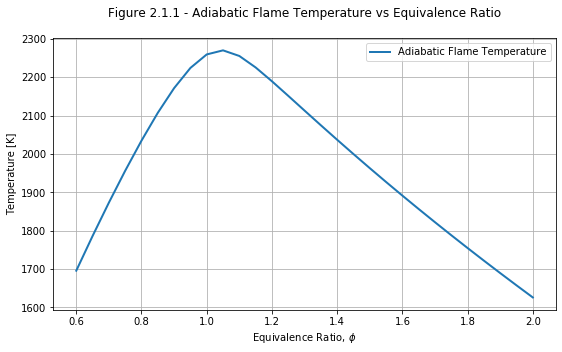

In [111]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object including incomplete combustion species
gas2_1 = ct.Solution(thermo='IdealGas', species=species.values())

# Initialize Matrices
phi = np.linspace(0.6, 2, 29)
    #print(phi)
xC2H6=np.zeros((29,1));
xO2=np.zeros((29,1));
xCO2=np.zeros((29,1));
xH2O=np.zeros((29,1));
xCO=np.zeros((29,1));
xH2=np.zeros((29,1));
T_incomplete = np.zeros(phi.shape)

# Find Equilibrium Values
for i in range(len(phi)):
    gas2_1.TPX = 300, ct.one_atm, 'C2H6:%5.6f, O2:3.5, N2:13.16' % phi[i]
    gas2_1.equilibrate('HP')
    T_incomplete[i] = gas2_1.T

    xC2H6[i]=gas2_1['C2H6'].X;
    xO2[i]=gas2_1['O2'].X;
    xCO2[i]=gas2_1['CO2'].X;
    xH2O[i]=gas2_1['H2O'].X;
    xCO[i]=gas2_1['CO'].X;
    xH2[i]=gas2_1['H2'].X;
    
# Print the final results
print ('\nThe Adiabatic flame temperatures for each Equivalence Ratio ranging from 0.6 to 2.0 with a step of 0.05 are:\n')
for i in range(len(phi)):
    print('     T_ad = %5.6f K     for' % T_incomplete[i], '    phi = %3.2f' % phi[i])
print ('\n\nThe plot of Adiabatic Flame Temperature as a function of Equivalence Ratio is given below:')

# Plot T{ad} vs Eq.Ratio
plt.figure(figsize=[9,5])
plt.plot(phi, T_incomplete, label='Adiabatic Flame Temperature', lw=2)
plt.title('Figure 2.1.1 - Adiabatic Flame Temperature vs Equivalence Ratio\n')
plt.xlabel('Equivalence Ratio, $\phi$')
plt.ylabel('Temperature [K]')
plt.grid(True);
plt.legend(loc=1);


The plot of Equilibrium Composition as a function of Equivalence Ratio is given below:


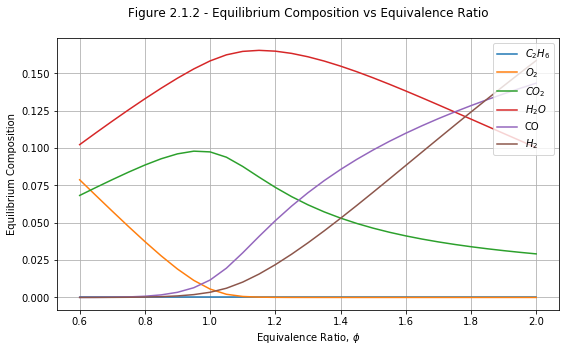

In [112]:
print ('\nThe plot of Equilibrium Composition as a function of Equivalence Ratio is given below:')

# Plot Eq.Composition vs Eq.Ratio
plt.figure(figsize=[9,5])
plt.plot(phi,xC2H6,label='$C_{2}H_{6}$')
plt.plot(phi,xO2,label='$O_{2}$')
plt.plot(phi,xCO2,label='$CO_{2}$')
plt.plot(phi,xH2O,label='$H_{2}O$')
plt.plot(phi,xCO,label='CO')
plt.plot(phi,xH2,label='$H_{2}$')
plt.title('Figure 2.1.2 - Equilibrium Composition vs Equivalence Ratio\n')
plt.xlabel('Equivalence Ratio, $\phi$')
plt.ylabel('Equilibrium Composition')
plt.grid(True);
plt.legend(loc=1);


To check what are the major species in the reaction (ones with a mole fraction > 0.00001), a plot of Mole Fraction as a function of Equivalence Ratio is given below:


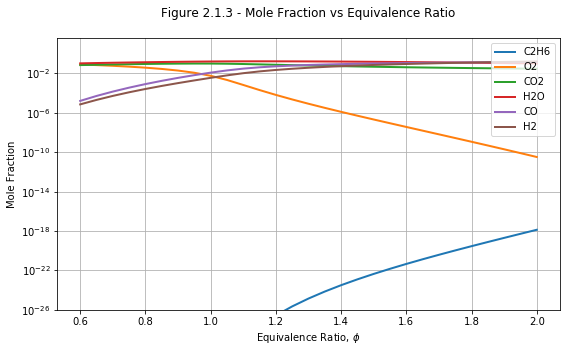

In [48]:
# Plot Mole Fraction vs Eq.Ratio
plt.figure(figsize=[9,5])
plt.semilogy(phi, xC2H6, label='C2H6',lw=2)
plt.semilogy(phi, xO2, label='O2',lw=2)
plt.semilogy(phi, xCO2, label='CO2',lw=2)
plt.semilogy(phi, xH2O, label='H2O',lw=2)
plt.semilogy(phi, xCO, label='CO',lw=2)
plt.semilogy(phi, xH2, label='H2',lw=2)
plt.title('Figure 2.1.3 - Mole Fraction vs Equivalence Ratio\n')
plt.xlabel('Equivalence Ratio, $\phi$')
plt.ylabel('Mole Fraction')
plt.grid(True);
plt.legend(loc=1);
plt.gca().set_ylim(bottom=10**-26)

print ('\nTo check what are the major species in the reaction (ones with a mole fraction > 0.00001), a plot of Mole Fraction as a function of Equivalence Ratio is given below:')


#### Comments:
<br>
$\textit{Figure 2.1.1}$ above shows that the adiabatic flame temperature increases with an increase in equivalence ratio, up to a maximum value of approximately 2270 K at $\phi\,=\,1.05$, then decreases as $\phi$ is raised to 2.0. This result agrees with our expectations, as $C_2H_6$ has a large heat capacity and thus requires a lot of energy before it can undergo combustion. In the fuel-lean case, the excess oxygen ensures that all of the $C_2H_6$ is used up during combustion, and as such, the energy stored by $C_2H_6$ is released to the products. Thus, it makes sense that the adiabatic temperature increases with equivalence ratio, as the amount of $C_2H_6$ involved in combustion is increased as $\phi$ increases, so more energy is released into the products which leads to a higher $T_{ad}$.<br>

Theoretically, at an equivalence ratio of one ( $\phi\,=\,1$ ), all of the $C_2H_6$ is used in the combustion process leading to the peak of the adiabatic temperature. But the computations performed above show that the peak is closer to $\phi\,=\,1.05$; this may be attributed to the effect of species dissociation. However, for equivalence ratios above one, $C_2H_6$ is in excess when compared to air, meaning there is not enough air to make use of all the fuel, so energy will be accumulated leading to a decrease in adiabatic flame temperature, as expected.

$\textit{Figure 2.1.2}$ shows that as the equivalence ratio increases to  $\phi\,=\,1$ , the equilibrium compositions of $CO_2$ and $H_2O$ increase, as do those of $H_2$ and $CO$ to a lesser degree, whereas that of $O_2$ decreases. As the equivalence ratio increases further beyond  $\phi\,=\,1$, the equilibrium composition of $CO_2$ and $H_2O$ decreases, as does that of $O_2$ which reaches zero at a value of $\phi\,\approx\,1.1$, while the equilibrium compositions of $H_2$ and $CO$ increase.<br>
<br>
$\textit{Figure 2.1.3}$ was generated to observe the major and minor species in the reaction. As shown, $C_2H_6$ has a mole fraction on the order of $10^{-17}$ to $10^{-26}$, making it a minor species. $CO$ and $H_2$ start as minor species ( Mole Fraction slightly < $10^{-5}$ ), but become major species as the reaction progresses. $O_2$ on the other hand starts as a major species but becomes a minor species as the reaction progresses (it reaches a mole fraction of $10^{-5}$ at $\phi\approx1.3$).

For $\phi\,<\,1$, the dissociation reactions of $CO_2$ and $H_2O$ are not favoured whereas they are favoured for $\phi\,>\,1$. This leads to a higher concentration of the minor species $CO$, $H_2$, and $O_2$ and a lower concentration of the major species $CO_2$ and $H_2O$ which have been changed into minor species. The dissociation equations of interest are:
$$CO_2\rightarrow 2CO+O_2$$
$$2H_2O\rightarrow 2H_2+O_2$$

<a id='Section2_2'><a>

### 2.2 - Adiabatic Flame Temperature and Equilibrium Composition for a Range of Pressures

The adiabatic flame temperature will be computed using Cantera for pressures between 1 and 36 atm at a fixed initial temperature and equivalence ratio (300 K and 1 respectively). The effect of pressure on the adiabatic flame temperature and on the equilibrium concentration of product species will be analyzed.



The Adiabatic flame temperatures for each pressure ranging from 1 to 36 atm with a step of 5 atm are:

     T_ad = 2259.598170 K     for     P =   1 atm
     T_ad = 2299.685750 K     for     P =   6 atm
     T_ad = 2310.687568 K     for     P =  11 atm
     T_ad = 2316.873368 K     for     P =  16 atm
     T_ad = 2321.078948 K     for     P =  21 atm
     T_ad = 2324.219497 K     for     P =  26 atm
     T_ad = 2326.701234 K     for     P =  31 atm
     T_ad = 2328.738298 K     for     P =  36 atm


The plot of Adiabatic Flame Temperature as a function of Pressure P is given below:


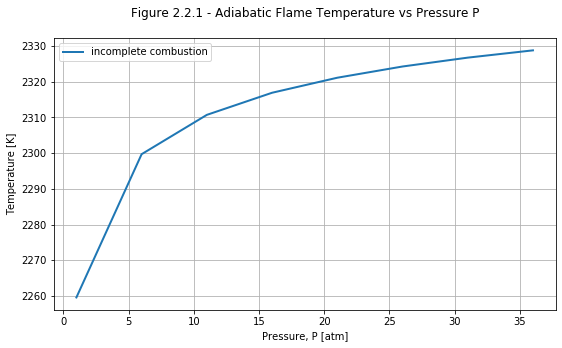

In [49]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object including incomplete combustion species
gas2_2 = ct.Solution(thermo='IdealGas', species=species.values())

# Reinitialize Constants and Matrices
phi = 1;
pressure = np.linspace(1, 36, 8)    # in atmospheres so multiply by 101325 later to convert to Pa
xC2H6 = np.zeros((8,1));
xO2 = np.zeros((8,1));
xCO2 = np.zeros((8,1));
xH2O = np.zeros((8,1));
xCO = np.zeros((8,1));
xH2 = np.zeros((8,1));
T_incomplete = np.zeros(pressure.shape)

# Find Equilibrium Values
for i in range(len(pressure)):
    gas2_2.TPX = 300, pressure[i]*101325, 'C2H6:%5.6f, O2:3.5, N2:13.16' % phi
    gas2_2.equilibrate('HP')
    T_incomplete[i] = gas2_2.T
    
    xC2H6[i]=gas2_2['C2H6'].X;
    xO2[i]=gas2_2['O2'].X;
    xCO2[i]=gas2_2['CO2'].X;
    xH2O[i]=gas2_2['H2O'].X;
    xCO[i]=gas2_2['CO'].X;
    xH2[i]=gas2_2['H2'].X;

    
# Print the final results for T{ad}
print ('\nThe Adiabatic flame temperatures for each pressure ranging from 1 to 36 atm with a step of 5 atm are:\n')
for i in range(len(pressure)):
    print('     T_ad = %5.6f K     for' % T_incomplete[i], '    P = %3.0f atm' % pressure[i])

# Plot Eq.Composition vs Pressure
plt.figure(figsize=[9,5])
plt.plot(pressure, T_incomplete, label='incomplete combustion', lw=2)
plt.grid(True)
plt.legend(loc=2)
plt.xlabel('Pressure, P [atm]')
plt.ylabel('Temperature [K]');
plt.title('Figure 2.2.1 - Adiabatic Flame Temperature vs Pressure P\n')

print ('\n\nThe plot of Adiabatic Flame Temperature as a function of Pressure P is given below:')



The plot of Equilibrium Composition as a function of Pressure P is given below:


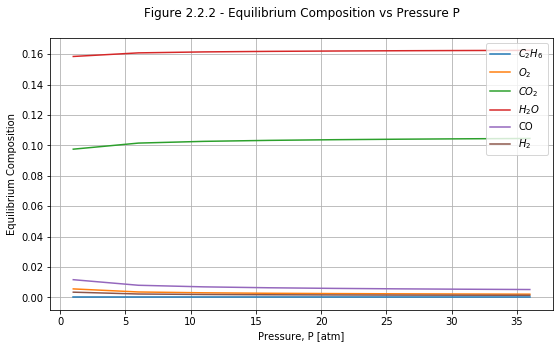

In [50]:
# Plot Eq.Composition vs Pressure
print ('\nThe plot of Equilibrium Composition as a function of Pressure P is given below:')

plt.figure(figsize=[9,5])
plt.plot(pressure,xC2H6,label='$C_{2}H_{6}$')
plt.plot(pressure,xO2,label='$O_{2}$')
plt.plot(pressure,xCO2,label='$CO_{2}$')
plt.plot(pressure,xH2O,label='$H_{2}O$')
plt.plot(pressure,xCO,label='CO')
plt.plot(pressure,xH2,label='$H_{2}$')
plt.grid(True)
plt.xlabel('Pressure, P [atm]')
plt.ylabel('Equilibrium Composition')
plt.title('Figure 2.2.2 - Equilibrium Composition vs Pressure P\n')
plt.legend(loc=1);



The plot of Mole Fraction as a function of Pressure P is given below.
C2H6 was not included because its mole fraction is negligible compared to the rest.  


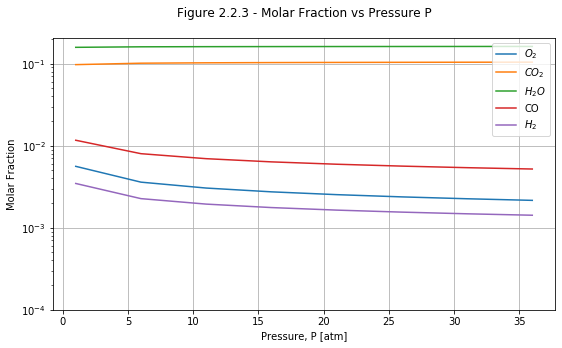

In [51]:
# Plot Mole Fraction vs Pressure
plt.figure(figsize=[9,5])
#plt.semilogy(pressure,xC2H6,label='$C_{2}H_{6}$')
plt.semilogy(pressure,xO2,label='$O_{2}$')
plt.semilogy(pressure,xCO2,label='$CO_{2}$')
plt.semilogy(pressure,xH2O,label='$H_{2}O$')
plt.semilogy(pressure,xCO,label='CO')
plt.semilogy(pressure,xH2,label='$H_{2}$')
plt.grid(True)
plt.xlabel('Pressure, P [atm]')
plt.ylabel('Molar Fraction')
plt.title('Figure 2.2.3 - Molar Fraction vs Pressure P\n')
plt.legend(loc=1);
plt.gca().set_ylim(bottom=10**-4)

print ('\nThe plot of Mole Fraction as a function of Pressure P is given below.')
print ('C2H6 was not included because it''s mole fraction is negligible compared to the rest.  ')



#### Comments:
<br>
$\textit{Figure 2.2.1}$ shows that as pressure increases, so does the adiabatic flame temperature, an effect explained by species dissociation. The reduced amount of dissociation with increasing pressure implies that $T_{ad}$ is higher at higher pressures, with the effect most prominent around stoichiometry where dissociation is most severe. The pressure effect is quite moderate, although it is not negligible in view of the temperature sensitivity of chemical reactions. In other words this increase in $T_{ad}$ is not very significant (a total increase of around 70 K over a pressure difference of 35 atm), at least when compared to the increase in $T_{ad}$ caused by changing the equivalence ratio. 

Unlike at high pressures, where dissociation reactions do not proceed towards the minor species ($O_2$, $CO$ and $H_2$), adiabatic flame temperature is lower at lower pressures, where pressure has only a small effect on the dissociation reaction and more minor species are formed. While the major species have a higher heat capacity which would reduce the adiabatic flame temperature as the concentration of major species increases, the effects of pressure push the reaction to release energy by the change of minor species to major species overcomes the effect of heat capacity and leads to an increase in adiabatic flame temperature.



$\textit{Figure 2.2.2}$ shows that as pressure increases, the concentration of $CO_2$ and $H_2O$ slightly increases while that of $O_2$, $CO$ and $H_2$ slightly decreases. The same behaviors are exhibited when checking $\textit{Figure 2.2.3}$.

The change in concentration of $C_2H_6$ is negligible because it is a minor species. To explain these changes one must consider species dissociation:

$$CO_2\rightarrow 2CO+O_2$$
$$2H_2O\rightarrow 2H_2+O_2$$

When the pressure in the reaction chamber is increased, the system will react accordingly to re-equilibrate the pressure. This is done by reducing the number of molecules present in the system. In accordance with Le Chatelier's Principle, the reaction will favour the direction that reduces the number of molecules which is the side of the reaction with the lower number of moles. In the case of both the dissociation of $CO_2$ and $H_2O$, this corresponds to the side of the reaction on which both $CO_2$ and $H_2O$ reside. In the case of $CO_2$ dissociation, there is one mole of $CO_2$ for 3 moles of product species ($CO$ and $O_2$). In the case of $H_2O$ dissociation, there are 2 moles of $H_2O$ for 4 moles of product species ($H_2$ and $O_2$).<br>
<br>


<a id='Section2_3'><a>

### 2.3 - Adiabatic Flame Temperature and Equilibrium Composition for a Range of Initial Temperatures

The adiabatic flame temperature will be computed using Cantera for initial temperatures between 300 and 900 K at a fixed pressure and equivalence ratio (1 atm and 1 respectively). The effect of initial temperature on the adiabatic flame temperature and on the equilibrium concentration of the product species will be analyzed.


The Adiabatic flame temperatures for each initial temperature ranging from 300 K to 900 K with a step of 100 K are:

     T_ad = 2259.598170 K     for     Ti = 300 K
     T_ad = 2305.604508 K     for     Ti = 400 K
     T_ad = 2350.704754 K     for     Ti = 500 K
     T_ad = 2394.969123 K     for     Ti = 600 K
     T_ad = 2438.411239 K     for     Ti = 700 K
     T_ad = 2481.008750 K     for     Ti = 800 K
     T_ad = 2522.718537 K     for     Ti = 900 K


The plot of Adiabatic Flame Temperature as a function of Initial Temperature is given below:


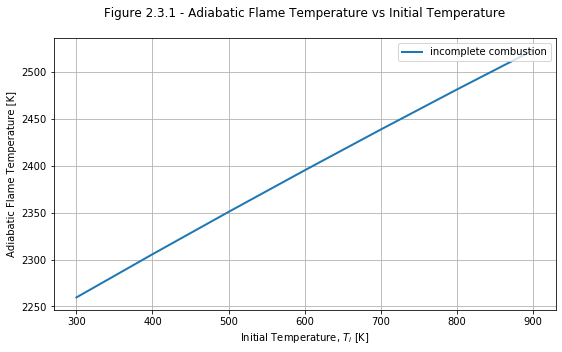

In [52]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object including incomplete combustion species
gas2_3 = ct.Solution(thermo='IdealGas', species=species.values())

# Reinitialize constants and matrices
phi = 1
temperature = np.linspace(300, 900, 7)
xC2H6 = np.zeros((7,1));
xO2 = np.zeros((7,1));
xCO2 = np.zeros((7,1));
xH2O = np.zeros((7,1));
xCO = np.zeros((7,1));
xH2 = np.zeros((7,1));
T_incomplete = np.zeros(temperature.shape)

# Find Equilibrium Values
for i in range(len(temperature)):
    gas2_3.TPX = temperature[i], ct.one_atm, 'C2H6:%5.6f, O2:3.5, N2:13.16' % phi
    gas2_3.equilibrate('HP')
    T_incomplete[i] = gas2_3.T
    
    xC2H6[i]=gas2_3['C2H6'].X;
    xO2[i]=gas2_3['O2'].X;
    xCO2[i]=gas2_3['CO2'].X;
    xH2O[i]=gas2_3['H2O'].X;
    xCO[i]=gas2_3['CO'].X;
    xH2[i]=gas2_3['H2'].X;

    
# Print the final results for T{ad}
print ('\nThe Adiabatic flame temperatures for each initial temperature ranging from 300 K to 900 K with a step of 100 K are:\n')
for i in range(len(temperature)):
    print('     T_ad = %5.6f K     for' % T_incomplete[i], '    Ti = %3.0f K' % temperature[i])


# Plot Adiabatic Flame Temp vs Eq.Ratio
plt.figure(figsize=[9,5])
plt.plot(temperature, T_incomplete, label='incomplete combustion', lw=2)
plt.grid(True)
plt.legend(loc=1)
plt.xlabel('Initial Temperature, $T_i$ [K]')
plt.ylabel('Adiabatic Flame Temperature [K]');
plt.title('Figure 2.3.1 - Adiabatic Flame Temperature vs Initial Temperature\n')

print ('\n\nThe plot of Adiabatic Flame Temperature as a function of Initial Temperature is given below:')


The plot of Equilibrium Composition as a function of Initial Temperature is given below:


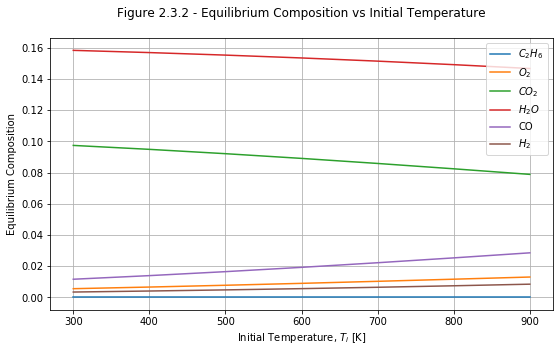

In [53]:
print ('\nThe plot of Equilibrium Composition as a function of Initial Temperature is given below:')

plt.figure(figsize=[9,5])
plt.plot(temperature,xC2H6,label='$C_{2}H_{6}$')
plt.plot(temperature,xO2,label='$O_{2}$')
plt.plot(temperature,xCO2,label='$CO_{2}$')
plt.plot(temperature,xH2O,label='$H_{2}O$')
plt.plot(temperature,xCO,label='CO')
plt.plot(temperature,xH2,label='$H_{2}$')
plt.grid(True)
plt.xlabel('Initial Temperature, $T_i$ [K]')
plt.ylabel('Equilibrium Composition');
plt.title('Figure 2.3.2 - Equilibrium Composition vs Initial Temperature\n')
plt.legend(loc=1);



The plot of Mole Fraction as a function of Initial Temperature T is given below.
C2H6 was not included because its mole fraction is negligible compared to the rest.  


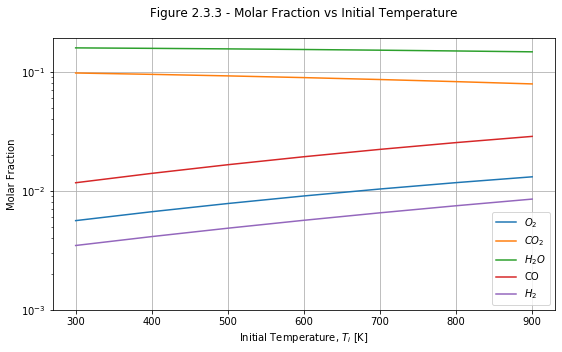

In [54]:
# Plot Mole Fraction vs Pressure
plt.figure(figsize=[9,5])
#plt.semilogy(temperature,xC2H6,label='$C_{2}H_{6}$')
plt.semilogy(temperature,xO2,label='$O_{2}$')
plt.semilogy(temperature,xCO2,label='$CO_{2}$')
plt.semilogy(temperature,xH2O,label='$H_{2}O$')
plt.semilogy(temperature,xCO,label='CO')
plt.semilogy(temperature,xH2,label='$H_{2}$')
plt.grid(True)
plt.xlabel('Initial Temperature, $T_i$ [K]')
plt.ylabel('Molar Fraction')
plt.title('Figure 2.3.3 - Molar Fraction vs Initial Temperature\n')
plt.legend(loc=4);
plt.gca().set_ylim(bottom=10**-3)

print ('\nThe plot of Mole Fraction as a function of Initial Temperature T is given below.')
print ('\nC2H6 was not included because it''s mole fraction is negligible compared to the rest.  ')



#### Comments:
<br>
$\textit{Figure 2.3.1}$ shows that as as initial temperature increases, so does the adiabatic flame temperature. This is expected since the initial enthalpy of the reactants would be higher for a higher initial temperature and thus the enthalpy of the products will also increase. The lower heat capacity of the minor species compared to the major species leads to an increase in adiabatic flame temperature.


$\textit{Figure 2.3.2}$ shows that as initial temperature increases, the equilibrium compositions of $CO_2$ and $H_2O$ decrease while those of $O_2$, $CO$, and $H_2$ increase. These changes in equilibrium compositions are more significant than those caused by a change in pressure. The same behaviors are exhibited when checking $\textit{Figure 2.3.3}$.

To explain these changes we must again consider species dissociation. For both dissociation equations involving $CO_2$ and $H_2O$ the reaction has a positive heat of reaction meaning that they are endothermic. According to Le Chatelier's Principle, when the temperature of an endothermic reaction is increased, the forward reaction which leads to the formation of the product species will be favoured in order to offset the change and consume the extra heat. As such, $CO_2$ and $H_2O$ will be consumed in favour of the production of $O_2$, $CO$ and $H_2$.<br>
<br>


<a id='Section2_4'><a>

### 2.4 - Bonus Question

In [121]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object including incomplete combustion species
gas2_5 = ct.Solution(thermo='IdealGas', species=species.values())

# Initialize constants and matrices 
phi = 0.6
InitialPressure = 25 #[atm]
InitialTemperature = 750 #[K]

# Evaluate at Equilibrium
gas2_5.TPX = InitialTemperature, InitialPressure*101325, 'C2H6:%5.6f, O2:3.5, N2:13.16' % phi
gas2_5.equilibrate('HP')
T_ad = gas2_5.T
xNO = gas2_5['NO'].X;

# Print Results
print('\nThe results obtained using Cantera are:')

print('\nAdiabatic Flame Temperature:')
print('T_ad = %5.6f K' %T_ad)

print('\nEquilibrium Concentration of NO:')
print('[NO] = ',xNO,'  (moles of NO / total moles)')



The results obtained using Cantera are:

Adiabatic Flame Temperature:
T_ad = 2045.345425 K

Equilibrium Concentration of NO:
[NO] =  [0.00511747]   (moles of NO / total moles)


<a id='Section3'><a>

## Part 3 - Chemical Equilibrium: Exhaust Gas Recirculation (EGR)
<br>

As result of combustion reactions, harmful pollutants are produced. Namely, the nitrogen oxides, $NO_x$ gases, $NO$ and $NO_2$ are produced as result of the dissociation of $N_2$ and the subsequent reaction with $O$. Because the dissociation of $N_2$ requires high levels of energy, the temperature dependence of $NO_x$ can be exploited by controling the flame temperature through reactant dilution. Dilution is achieved through the addition of helium, argon, nitrogen or carbon dioxide. The level of dilution is controlled by varying the mole fraction of the dilutant in the reactants thereby tunning the resulting adiabatic flame temperature and, consequently gaining the ability to compare fuels through their chemistry and reducing pollutant formation.<br>
An efficient method for achieving dilution is to divert exhaust gases back to the inlet of the engine where the combustion reaction is to take place. Exhaust gas recirculation (EGR) results in $CO_2$ dilution as $CO_2$ is the primary species in exhaust gas.<br>
<br>
The following sections will explore the combustion of a $CH_4$ + air mixture with $CO_2$ dilution using Cantera to determine the effect of the degree of $CO_2$ dilution on the adiabatic flame temperature as well as the effect on the formation of nitrogen oxides and carbon dioxide.

<a id='Section3_1'><a>

### 3.1 - $\,\mathrm{CO_2}$ Dilution in $\,\mathrm{CH_4}+\mathrm{Air\,Flames}$



<a id='Section3_1_1'><a>

#### 3.1.1 - Effect of $\,\mathrm{CO_2}$ Dilution on Adiabatic Flame Temperature

The mole fraction relations for reactants and products are given below:

$$X_{i,\space reactants}=\frac{X_i}{X_{reactants}} \;\;\;\;\; and \;\;\;\;\;\; X_{i,\space products}=\frac{X_i}{X_{products}}$$

where $X_i$ is the number of moles of species $i$ and $X_{reactants}$ and $X_{products}$ are the number of moles of reactants and products, respectively.<br>
<br>
In the case of dilution by $CO_2$, the mole fraction can be varied to alter the degree of dilution.<br>


The combustion of $CH_4$ is normally given by:
$$CH_4+2(O_2+3.76N_2)\rightarrow CO_2+2H_2O+7.56N_2$$

When $CO_2$ is added to the reactants with a designated molar fraction, the following must be solved for y:

$$CH_4+2(O_2+3.76N_2)+yCO_2\rightarrow products$$
As such,
$$X_{CO_2}=\frac{y}{1+2+2(3.76)}$$<br>
$$10.52X_{CO_2}+yX_{CO_2}=y$$<br>
$$10.52X_{CO_2}=y(1-X_{CO_2})$$<br>
$$y=\frac{10.52X_{CO_2}}{1-X_{CO_2}}$$<br>
<br>
The following computation will make use of Cantera to compute the adiabatic flame temperature resulting from the combustion of $CH_4$ with $CO_2$ dilution for a mole fraction of $CO_2$ ranging from 0 to 0.95.


The Adiabatic flame temperatures for each mole fraction of CO2 ranging from 0 to 0.95 with a step of 0.05 are:

     T_ad = 2214.408297 K     for     X_CO2 = 0.00
     T_ad = 2114.548959 K     for     X_CO2 = 0.05
     T_ad = 2017.455276 K     for     X_CO2 = 0.10
     T_ad = 1922.965134 K     for     X_CO2 = 0.15
     T_ad = 1831.179523 K     for     X_CO2 = 0.20
     T_ad = 1742.238642 K     for     X_CO2 = 0.25
     T_ad = 1656.225762 K     for     X_CO2 = 0.30
     T_ad = 1573.144225 K     for     X_CO2 = 0.35
     T_ad = 1492.929765 K     for     X_CO2 = 0.40
     T_ad = 1415.471066 K     for     X_CO2 = 0.45
     T_ad = 1340.628675 K     for     X_CO2 = 0.50
     T_ad = 1268.248173 K     for     X_CO2 = 0.55
     T_ad = 1198.168842 K     for     X_CO2 = 0.60
     T_ad = 1130.228460 K     for     X_CO2 = 0.65
     T_ad = 1064.266058 K     for     X_CO2 = 0.70
     T_ad = 1000.123201 K     for     X_CO2 = 0.75
     T_ad = 937.598748 K     for     X_CO2 = 0.80
     T_ad = 876.49249

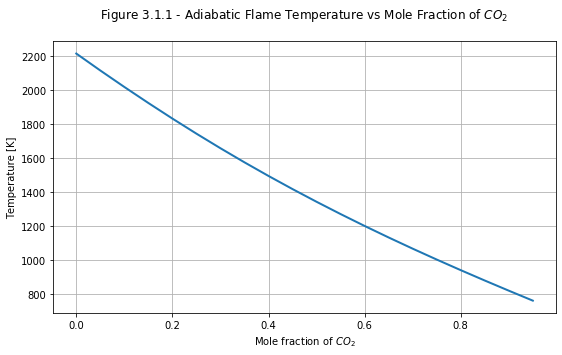

In [116]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object including incomplete combustion species
gas3_1 = ct.Solution(thermo='IdealGas', species=species.values())

# Initialize Constants and Matrices
phi = 0.75
InitialPressure = 15 #[atm] 
InitialTemperature = 700 #[K]
X_CO2 = np.linspace(0, 0.95, 20)
T_incomplete = np.zeros(X_CO2.shape)

# Evaluate at Equilibrium
for i in range(len(X_CO2)):
    x_CO2=10.52*X_CO2[i]/(1-X_CO2[i])
    gas3_1.TPX = InitialTemperature, InitialPressure*101325, 'CH4:0.75, O2:2, N2:7.52, CO2:%5.6f' % x_CO2
    gas3_1.equilibrate('HP')
    T_incomplete[i] = gas3_1.T

    
# Print the final results
print ('\nThe Adiabatic flame temperatures for each mole fraction of CO2 ranging from 0 to 0.95 with a step of 0.05 are:\n')
for i in range(len(X_CO2)):
    print('     T_ad = %5.6f K     for' % T_incomplete[i], '    X_CO2 = %3.2f' % X_CO2[i])


#Plot results
plt.figure(figsize=[9,5])
plt.plot(X_CO2, T_incomplete, lw=2);
plt.xlabel('Mole fraction of $CO_2$');
plt.ylabel('Temperature [K]');
plt.grid(True)
plt.title('Figure 3.1.1 - Adiabatic Flame Temperature vs Mole Fraction of $CO_2$\n');

$\textit{Figure 3.1.1}$ shows that as the degree of dilution increases, the adiabatic flame temperature will decrease. Increasing the concentration of $CO_2$ reduces the relative concentrations of the other reactants which leads to an overall decrease in reaction rate. Moreover, the additional $CO_2$ absorbs energy in order to undergo its endothermic dissociation process. This lowering the energy available to other reactants thereby decreasing the ability to overcome the hump of active energy needed for the reaction to proceed. These factors combined lead to a decrease in adiabatic flame temperature as the mole fraction of $CO_2$ increases.

<a id='Section3_1_2'><a>

#### 3.1.2 - Estimation of adiabatic flame temperature with 100% dilution by $CO_2$

If the dilution level is increased to 100% the adiabatic flame temperature will equal the initial temperature (700 K). Looking at $\textit{Figure 3.1.1}$, this estimation seems to be accurate.

<a id='Section3_1_3'><a>

#### 3.1.3 - Concentrations of $NO$, $NO_2$ and $CO$ for a range of $CO_2$ dilution levels

The following computation will make use of Cantera to determine the concentration of $NO$, $NO_2$ and $CO$ resulting from the combustion of $CH_4$ with $CO_2$ dilution for a mole fraction of $CO_2$ ranging from 0 to 0.95.


The plot of Equilibrium Composition of NO, NO2, and CO as a function of Mole Fraction of CO2 is given below:


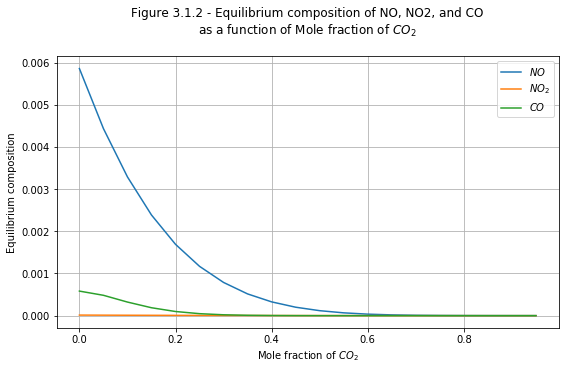

In [118]:
# Same gas (species) is used

# Initialize new Matrices
cNO=np.zeros((20,1));
cNO2=np.zeros((20,1));
cCO=np.zeros((20,1));

# Evaluate at Equilibrium
for i in range(len(X_CO2)):
    x_CO2=10.52*X_CO2[i]/(1-X_CO2[i])
    gas3_1.TPX = InitialTemperature, InitialPressure*101325, 'CH4:0.75, O2:2, N2:7.52, CO2:%5.6f' % x_CO2
    gas3_1.equilibrate('HP')
    cNO[i]=gas3_1['NO'].X;
    cNO2[i]=gas3_1['NO2'].X;
    cCO[i]=gas3_1['CO'].X;

# Plot Eq.Composition vs Mole Fraction CO2
plt.figure(figsize=[9,5])
plt.plot(X_CO2,cNO,label='$NO$')
plt.plot(X_CO2,cNO2,label='$NO_{2}$')
plt.plot(X_CO2,cCO,label='$CO$')
plt.xlabel('Mole fraction of $CO_2$')
plt.ylabel('Equilibrium composition')
plt.title('Figure 3.1.2 - Equilibrium composition of NO, NO2, and CO\nas a function of Mole fraction of $CO_2$\n')
plt.legend(loc=1);
plt.grid(True)

print ('\nThe plot of Equilibrium Composition of NO, NO2, and CO as a function of Mole Fraction of CO2 is given below:')



$\textit{Figure 3.2.1}$ shows that as the degree of $CO_2$ dilution increases, the concentration of $NO$, $NO_2$, and $CO$ decrease until reaching zero. As explained in section 3.1.1, the addition of $CO_2$ slows down the reaction as result of decreased reactant concentration and the energy absorbed by $CO_2$. Consequently, less product species are produced. Moreover, there is less energy available for the endothermic reactions required to for the product dissociation reactions that lead to the production of $NO$, $NO_2$, and $CO$. Thus, less of these minor species are produced as the level of $CO_2$ dilution is increased.

<a id='Section3_2'><a>

### 3.2 - Bonus question ($\,\mathrm{Ar}$ Dilution in $\,\mathrm{CH_4}+\mathrm{Air\,Flames}$)

<a id='Section3_2_1'><a>

#### 3.2.1 - Effect of $\,\mathrm{Ar}$ Dilution on Adiabatic Flame Temperature

The following computation will make use of Cantera to compute the adiabatic flame temperature resulting from the combustion of $CH_4$ with $Ar$ dilution for a mole fraction of $Ar$ ranging from 0 to 0.95.


The Adiabatic flame temperatures for each mole fraction of Ar ranging from 0 to 0.95 with a step of 0.05 are:

     T_ad = 2214.408297 K     for     X_Ar = 0.00
     T_ad = 2177.151349 K     for     X_Ar = 0.05
     T_ad = 2137.409880 K     for     X_Ar = 0.10
     T_ad = 2094.997897 K     for     X_Ar = 0.15
     T_ad = 2049.717641 K     for     X_Ar = 0.20
     T_ad = 2001.358111 K     for     X_Ar = 0.25
     T_ad = 1949.693508 K     for     X_Ar = 0.30
     T_ad = 1894.480438 K     for     X_Ar = 0.35
     T_ad = 1835.455357 K     for     X_Ar = 0.40
     T_ad = 1772.331142 K     for     X_Ar = 0.45
     T_ad = 1704.793978 K     for     X_Ar = 0.50
     T_ad = 1632.500344 K     for     X_Ar = 0.55
     T_ad = 1555.075364 K     for     X_Ar = 0.60
     T_ad = 1472.112654 K     for     X_Ar = 0.65
     T_ad = 1383.177288 K     for     X_Ar = 0.70
     T_ad = 1287.813110 K     for     X_Ar = 0.75
     T_ad = 1185.556942 K     for     X_Ar = 0.80
     T_ad = 1075.963426 K     for     

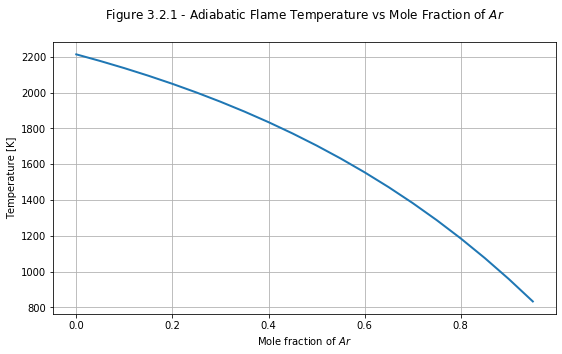

In [117]:
# Get all of the Species objects defined in the GRI 3.0 mechanism
species = {S.name: S for S in ct.Species.listFromFile('gri30.cti')}

# Create an IdealGas object including incomplete combustion species
gas3_2 = ct.Solution(thermo='IdealGas', species=species.values())

# Initialize Constants and Matrices
phi = 0.75
InitialPressure = 15 #[atm] 
InitialTemperature = 700 #[K]
X_Ar = np.linspace(0, 0.95, 20)
T_incomplete = np.zeros(X_Ar.shape)

# Evaluate at Equilibrium
for i in range(len(X_Ar)):
    x_Ar=10.52*X_Ar[i]/(1-X_Ar[i])
    gas3_2.TPX = InitialTemperature, InitialPressure*101325, 'CH4:0.75, O2:2, N2:7.52, Ar:%5.6f' % x_Ar
    gas3_2.equilibrate('HP')
    T_incomplete[i] = gas3_2.T

    
# Print the final results
print ('\nThe Adiabatic flame temperatures for each mole fraction of Ar ranging from 0 to 0.95 with a step of 0.05 are:\n')
for i in range(len(X_Ar)):
    print('     T_ad = %5.6f K     for' % T_incomplete[i], '    X_Ar = %3.2f' % X_Ar[i])


#Plot results
plt.figure(figsize=[9,5])
plt.plot(X_Ar, T_incomplete, lw=2);
plt.xlabel('Mole fraction of $Ar$');
plt.ylabel('Temperature [K]');
plt.grid(True)
plt.title('Figure 3.2.1 - Adiabatic Flame Temperature vs Mole Fraction of $Ar$\n');



<a id='Section3_2_2'><a>

#### 3.2.2 - Estimation of adiabatic flame temperature with 100% dilution by $Ar$

Same as before, if the dilution level is increased to 100% the adiabatic flame temperature will be approximately equal to the initial temperature (700 K). Looking at $\textit{Figure 3.2.1}$, this estimation seems to be accurate.

<a id='Section3_2_3'><a>

#### 3.2.3 - Concentrations of $NO$, $NO_2$ and $CO$ for a range of $Ar$ dilution levels


The plot of Equilibrium Composition of NO, NO2, and CO as a function of Mole Fraction of Ar is given below:


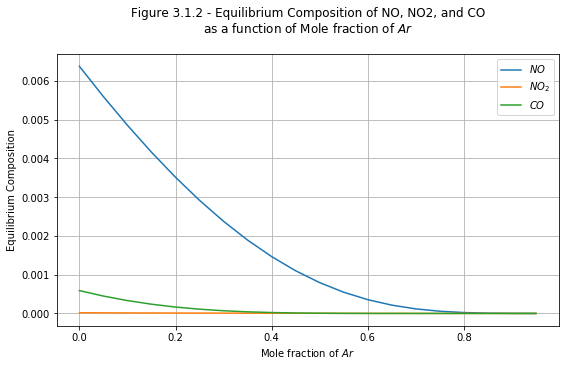

In [123]:
# Initialize new Matrices
cNO=np.zeros((20,1));
cNO2=np.zeros((20,1));
cCO=np.zeros((20,1));

# Evaluate at Equilibrium
for i in range(len(X_Ar)):
    x_Ar=10.52*X_Ar[i]/(1-X_Ar[i])
    gas3_2.TPX = InitialTemperature, InitialPressure*101325, 'CH4:0.75, O2:2, N2:7.52, Ar:%5.6f' % x_Ar
    gas3_2.equilibrate('HP')
    cNO[i]=gas3_2['NO'].X;
    cNO2[i]=gas3_2['NO2'].X;
    cCO[i]=gas3_2['CO'].X;

# Plot Eq.Composition vs Mole Fraction CO2
plt.figure(figsize=[9,5])
plt.plot(X_Ar,cNO,label='$NO$')
plt.plot(X_Ar,cNO2,label='$NO_{2}$')
plt.plot(X_Ar,cCO,label='$CO$')
plt.xlabel('Mole fraction of $Ar$')
plt.ylabel('Equilibrium Composition')
plt.title('Figure 3.1.2 - Equilibrium Composition of NO, NO2, and CO\nas a function of Mole fraction of $Ar$\n')
plt.legend(loc=1);
plt.grid(True)

print ('\nThe plot of Equilibrium Composition of NO, NO2, and CO as a function of Mole Fraction of Ar is given below:')

It is shown that the greater the degree of dilution, the lower the adiabatic flame temperature. Increasing the concentration of $Ar$ reduces the relative concentrations of the other reactants which leads to an overall decrease in reaction rate. However, because $Ar$ is an inert gas, unlike $CO_2$, it does not absorb the energy available to other reactants thereby decreasing the ability to overcome the hump of active energy needed for the reaction to proceed. The decrease in adiabatic flame temperature for dilution with Argon is not as significant as that of dilution with $CO_2$. Ths can be explained by the fact that $CO_2$ has a larger specific heat capacity (about 60% larger). Therefore less energy is required to increase Argon's Enthalpy. Similarly, increasing the dillution factor to 100% would result in an adiabatic flame temperature of 700 K, as Argon would not burn.



## Conclusion

In this report, the different aspects and concepts of complete and incomplete combustion of hydrocarbons were explored, with emphasis on the adiabatic flame temperature and equilibrium composition of the different species involved in the combustion process.<br>
<br>
Section 1 presented the challenge of analyzing complete combustion of propane, without having the luxury of using existing Cantera functions to evaluate the composition of the gas at equilibrium. A numerical solver was instead developed to compute the adiabatic flame temperatures at different equivalence ratios. The influence of $\phi$ on the adiabatic flame temperature was also studied. The main takeaway was that in a system where the limiting reactant is completely consumed, $T_{ad}$ increases with $\phi$ until it reaches a maximum at around $\phi =1$ where the combustion is said to be complete. For an equivalence ratio above 1, the adiabatic flame temperature decreases as $\phi$ increases, as more energy is required to bring the non-reacting species to final temperature.

Section 2 dealt with the effects caused by varying pressure, initial temperature, and equivalence ratios on both adiabatic flame temperature and species concentration at equilibrium. The effect of these parameters on the dissociation of major species into minor species through the Principles outlined by Le Chatalier were considered in depth in order to make sense of the mechanisms by which altering factors such as temperature, pressure and equivalence ratio affected the reaction.<br>
<br>
Finally, Section 3 considered the use of reactant dilution as a means to reduce the formation of pollutants such as $NO_x$ gases and the effects of this dilution on adiabatic flame temperature.<br>
<br>
Through completion of this project, a greater understanding was acheived with regards to the mechanisms behind the combustion of hydrocarbon fuels as well as the factors that influence these reactions.